In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

props = {
    "axes.grid": True,
    "grid.linestyle": '-',
    "xtick.direction": 'in',
    "ytick.direction": 'in',
    "xtick.top": False,
    "ytick.right": False,
    "xtick.bottom": True,
    "ytick.left": True,
    "axes.linewidth": 1.0,
    "axes.axisbelow": True
}

default_props = plt.rcParams.copy()
# mpl.RcParams(props)
plt.rcParams.update(props)

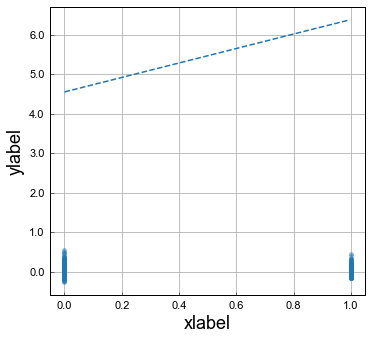

<Figure size 460.8x316.8 with 0 Axes>

In [5]:
import paper_plot as pplt
import seaborn as sns
import numpy as np

fmri = sns.load_dataset("fmri")

x = np.arange(0, 1, 0.01)
x = x.reshape(-1, 1)
y = x + 10*np.random.rand(100, 1)

fig = pplt.initialize()
ax1 = pplt.create_new_axis(fig, 111)
pplt.scatter(ax1, fmri.region, fmri.signal)
pplt.regression(ax1, x, y)
pplt.set_axes_params(fig, ax1)
pplt.display_process()

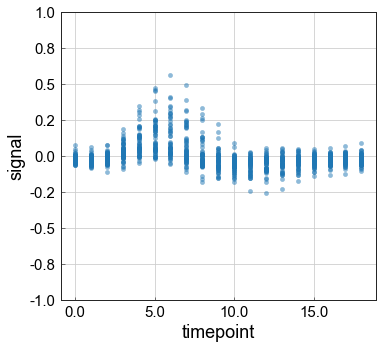

<Figure size 460.8x316.8 with 0 Axes>

In [7]:
import paper_plot as pplt
import seaborn as sns

fmri = sns.load_dataset("fmri")
fig = pplt.initialize(font_family="Arial")
ax1 = pplt.create_new_axis(fig, 111)
pplt.scatter(ax1, fmri["timepoint"], fmri["signal"])
# pplt.bar(ax1, fmri["timepoint"], fmri["signal"])
pplt.set_axes_params(
    fig, ax1,xlabel="timepoint", ylabel="signal",
    ticklabelsize=15, **{"ylim": (-1.0, 1.0)})
pplt.display_process()
# pp.save("sample.png")

In [1]:
# font 設定問題
# https://qiita.com/f0o0o/items/c2f74ac1d27e48d0fed1
# https://ricrowl.hatenablog.com/entry/2020/09/14/032424

import matplotlib.font_manager as fmg
flist = fmg.get_fontconfig_fonts()
print(len(flist))
print(flist[1500])
print(fmg.FontProperties(fname=flist[1500]))
fp_source = fmg.FontProperties(fname=flist[1500])
names = [fmg.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)


2261
C:/texlive/2019/texmf-dist/fonts/opentype/impallari/librebodoni/LibreBodoni-Italic.otf
sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=C\:/texlive/2019/texmf-dist/fonts/opentype/impallari/librebodoni/LibreBodoni-Italic.otf:size=10.0


In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
# import re
# for f in flist :
#     if re.search(".ttf", f) and not re.search("WINDOWS", f) :
#         print(f)
import paper_plot as pplt
pplt.print_example_fonts()


examples of available fonts 
(English) Times New Roman, Arial
Windows (Japanese): Yu Gothic, Yu Mincho
Mac (Japanese): Hiragino Maru Gothic Pro, Hiragino Mincho ProN
        


findfont: Font family ['Libre Bodoni'] not found. Falling back to DejaVu Sans.


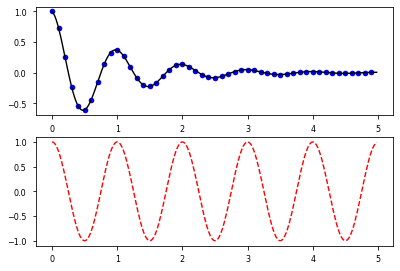

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-paper")
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# plt.rcParams["font.family"] = fp_source.get_name()

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

In [4]:
import paper_plot as pplt
pplt.check_setting_matplotlib("grid")

check parameters (rcParams) including 'grid' ------
axes.grid: True
axes.grid.axis: both
axes.grid.which: major
axes3d.grid: True
grid.alpha: 1.0
grid.color: #b0b0b0
grid.linestyle: -
grid.linewidth: 0.8
keymap.grid: ['g']
keymap.grid_minor: ['G']
polaraxes.grid: True


In [32]:
def f(**kwargs) :
    c = {**a, **kwargs}
    return c

In [56]:
import matplotlib.font_manager as fm
import re
font_prop = fm.FontProperties(family="serif",
#                               style="normal",
#                               variant="normal",
#                               weight="normal",
#                               stretch="normal",
#                               size="medium",
                             )
fm.findfont(font_prop)

fl = np.array(fm.findSystemFonts())
kw = "ゴシック"
ol = [p for p in fl if re.match(".*{}.*".format(kw), p)]

# 参照 

- plt.style.use
    - https://qiita.com/eriksoon/items/b93030ba4dc686ecfbba
    - https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
- matplotlib.font_manager
    - Font Properties
        - https://matplotlib.org/3.3.3/api/font_manager_api.html#matplotlib.font_manager.FontProperties
    
    